___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 7: Supervised learning

## Lab work 7



#### Мета: 

* навчитися використовувати моделі з учителем

### Завдання 1:

Для цього завдання ми будемо вивчати загальнодоступні дані з [LendingClub.com](www.lendingclub.com). 

Кредитний клуб пов'язує людей, яким потрібні гроші (позичальники), та людей, які мають гроші (інвесторів). Сподіваємось, як інвестор ви хотіли б інвестувати в людей, які продемонстрували, що вони мають високу ймовірність повернути вам гроші. Ми спробуємо створити модель, яка допоможе це передбачити.

Кредитний клуб мав [дуже цікавий 2016 рік](https://en.wikipedia.org/wiki/Lending_Club#2016), тож давайте перевіримо деякі їх дані.

Ми використовуватимемо дані про позики за 2007-2010 роки та намагатимемося класифікувати та прогнозувати, чи повертав позичальник їх повністю.

Ось що представляють стовпці:
* `credit.policy`: 1, якщо клієнт відповідає критеріям андеррайтингу кредитів LendingClub.com, і 0 в іншому випадку.

* `purpose`: мета позики (приймає значення "кредитна_карта", "консолідація боргу", "освітня", "основна_покупка", "малий бізнес" та "всі_інші").

* `int.rate`: процентна ставка позики, пропорційно (ставка 11% зберігатиметься як 0,11). Позичальникам, які LendingClub.com вважає більш ризикованими, призначаються вищі процентні ставки.

* `installment`: щомісячні виплати позичальника, якщо позика фінансується.

* `log.annual.inc`: журнал річного доходу позичальника, який самостійно звітується.

* `dti`: відношення боргу до доходу позичальника (сума боргу, поділена на річний дохід).

* `fico`: кредитний рейтинг позичальника FICO.

* `days.with.cr.line`: кількість днів, коли позичальник мав кредитну лінію.

* `revol.bal`: кредитний залишок позичальника (сума не виплачена в кінці циклу виставлення рахунків за кредитною карткою).

* `revol.util`: коефіцієнт використання кридитної лінії позичальника (сума використаної кредитної лінії відносно загальної кількості доступних кредитів).

* `inq.last.6mths`: кількість запитів позичальників з боку кредиторів за останні 6 місяців.

* `delinq.2yrs`: кількість разів, протягом яких позичальник прострочував платежі протягом останніх 2 років понад 30 днів.

* `pub.rec`: кількість публічних записів (заяви про банкрутство, податкова застава або рішення).

Алгоритм виконання та проміжні завдання:
1. Відкрийте файл та виведіть описову статистику

2. Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну.

3. Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot

4. Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції

5. purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies

6. Розбийте датасет на тестві та трейнові дані

7. Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost

8. Для кожної з моделей виведіть матрицю, основні метрики

8. *Використейте бібіотеку dtreeviz для візуалізації (там, де актуально)

9. Використайте ансамбель voting для всіх моделей

10. Порівняйте результати моделей та зробіть висновки

In [14]:
#import csv
#with open('loan_data.csv', 'r') as f:
 #   file_csv = csv.reader(f)
 #   data = list(file_csv)

In [9]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [227]:
#1. Відкриття файлу та виведення описової статистики
df = pd.read_csv('loan_data.csv')

In [228]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


In [69]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,NaN,NaN,NaN,0.80497,0.396245,0.0,1.0,1.0,1.0,1.0
purpose,9578,7,debt_consolidation,3957,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int.rate,9578.0,NaN,NaN,NaN,0.12264,0.026847,0.06,0.1039,0.1221,0.1407,0.2164
installment,9578.0,NaN,NaN,NaN,319.089413,207.071301,15.67,163.77,268.95,432.7625,940.14
log.annual.inc,9578.0,NaN,NaN,NaN,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,14.528354
dti,9578.0,NaN,NaN,NaN,12.606679,6.88397,0.0,7.2125,12.665,17.95,29.96
fico,9578.0,NaN,NaN,NaN,710.846314,37.970537,612.0,682.0,707.0,737.0,827.0
days.with.cr.line,9578.0,NaN,NaN,NaN,4560.767197,2496.930377,178.958333,2820.0,4139.958333,5730.0,17639.95833
revol.bal,9578.0,NaN,NaN,NaN,16913.963876,33756.189557,0.0,3187.0,8596.0,18249.5,1207359.0
revol.util,9578.0,NaN,NaN,NaN,46.799236,29.014417,0.0,22.6,46.3,70.9,119.0


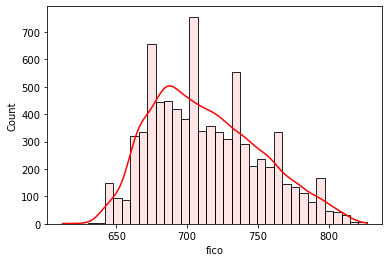

In [27]:
# 2.Створення двох гістограм по полю fico (перша для значень not.fully.paid=0, друга = 1)
sns.histplot(df['fico'][df['not.fully.paid']==0], kde=True, color='r', alpha=0.1)
plt.show()

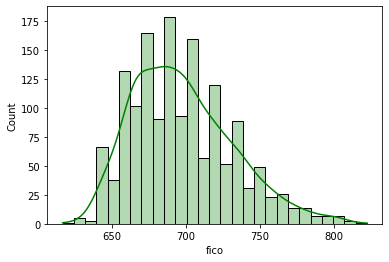

In [31]:
sns.histplot(df['fico'][df['not.fully.paid']==1], kde=True, color='g', alpha=0.3)
plt.show()

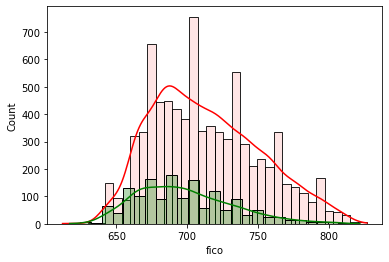

In [30]:
# Накладення одна на одну гістограм.
sns.histplot(df['fico'][df['not.fully.paid']==0], kde=True, color='r', alpha=0.1)
sns.histplot(df['fico'][df['not.fully.paid']==1], kde=True, color='g', alpha=0.3)
plt.show()

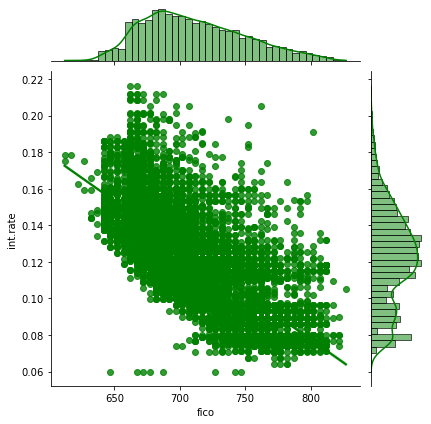

In [110]:
# 3.Відображення тенденції між оцінкою fico та int.rate 
sns.jointplot(x = 'fico', y = 'int.rate', data = df, color='g', kind='reg')
plt.show()

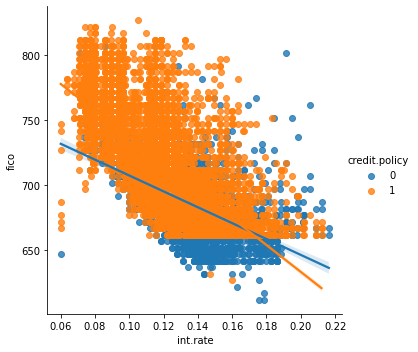

In [70]:
# 4.Побудова графіку lmplot на основі int.rate та fico. Коліром розідлено по полю credit.policy. 

sns.lmplot(x="int.rate", y="fico", data=df,  y_jitter=.05, hue='credit.policy')

In [296]:
#Розбиття по значеннях цільової функції (хоча не впевнений що правильно зрозумів завдання)
new_credit = np.digitize(df['credit.policy'], bins=[0, 1])
new_credit

array([2, 2, 2, ..., 1, 1, 1], dtype=int64)

In [232]:
# 5. Перетворення категорієї "purpose"
#1й Варіант як у завданні вказано
df_purpose=pd.get_dummies(df['purpose'], drop_first=True)
df_purpose

,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
9573,0,0,0,0,0,0
9574,0,0,0,0,0,0
9575,0,1,0,0,0,0
9576,0,0,0,1,0,0


In [234]:
df_purpose_all = pd.concat([df, df_purpose], axis=1)
df_purpose_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   credit.policy       9578 non-null   int64  
 1   purpose             9578 non-null   object 
 2   int.rate            9578 non-null   float64
 3   installment         9578 non-null   float64
 4   log.annual.inc      9578 non-null   float64
 5   dti                 9578 non-null   float64
 6   fico                9578 non-null   int64  
 7   days.with.cr.line   9578 non-null   float64
 8   revol.bal           9578 non-null   int64  
 9   revol.util          9578 non-null   float64
 10  inq.last.6mths      9578 non-null   int64  
 11  delinq.2yrs         9578 non-null   int64  
 12  pub.rec             9578 non-null   int64  
 13  not.fully.paid      9578 non-null   int64  
 14  credit_card         9578 non-null   uint8  
 15  debt_consolidation  9578 non-null   uint8  
 16  educat

In [240]:
# Зробив новий датасет для побудови моделі
X = df_purpose_all.select_dtypes(exclude='object').drop(columns=['credit.policy']).dropna(axis=0)
y = df_purpose_all['credit.policy']

In [266]:
# 6. Розбиття датасету на тестві та трейнові дані 
X = df_purpose_all[
    [
    'int.rate',
  'installment',
  'log.annual.inc',
  'dti',
  'fico',
  'days.with.cr.line',
  'revol.bal',
  'revol.util',
  'inq.last.6mths',
  'delinq.2yrs', 
    'pub.rec',
  'not.fully.paid',
  'credit_card',
        'debt_consolidation',
  'educational', 
    'home_improvement',
  'major_purchase',
  'small_business'
    ]
]
y = df_purpose_all['credit.policy']

In [267]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [268]:
X_train.shape

(7183, 18)

In [279]:
# 7(1). Утворюємо  модель, використовуючи логістичну регресію, тренуємо її і перевіряємо скор на трейні та тесті
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

print('Score на трейні', logmodel.score(X_train, y_train))
print('Score на тесті', logmodel.score(X_test, y_test))

Score на трейні 0.8681609355422525
Score на тесті 0.8705636743215032


C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [191]:
#2й Варіант 5го завдання зробив так, щоб було в 1 колонці 
df ['purpose_cod'] = df['purpose'].map({"credit_card":1,
                "debt_consolidation":2,
                "home_improvement":3,
                "major_purchase":4,
                "small_business":5,
                "all_other":6})
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_cod
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,2.0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1.0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,2.0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,2.0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,6.0
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,6.0
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,2.0
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,3.0


In [193]:
#Оскільки в колонці "purpose_cod" є порожні значення, то можна замінити їх на найчастіше зустрічаючих,але знову 
                                                                #ж таки виникає проблема з 1 колонку, а не 6ма 
purpose_cod2 = pd.get_dummies(df['purpose_cod'].fillna('2.0'), drop_first=True)
purpose_cod2

,2.0,3.0,4.0,5.0,6.0,2.0
0,1,0,0,0,0,0
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
9573,0,0,0,0,1,0
9574,0,0,0,0,1,0
9575,1,0,0,0,0,0
9576,0,1,0,0,0,0


In [235]:
#Оскільки не зовсім правильно змінювати на найчастіше трапляюче значення, бо порожніх достатньо багато, тому я 
                                                                        # в датафреймі прибрав рядки з пустими pначеннями
df_1=df.dropna ()
df_1

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [236]:
# Зробив новий датасет для побудови моделі
X1 = df_1.select_dtypes(exclude='object').drop(columns=['credit.policy']).dropna(axis=0)
y1 = df_1['credit.policy']

In [237]:
X1.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [238]:
X1.info() #Можна пересвідчитись, що пропущених значень нема

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   int.rate           9578 non-null   float64
 1   installment        9578 non-null   float64
 2   log.annual.inc     9578 non-null   float64
 3   dti                9578 non-null   float64
 4   fico               9578 non-null   int64  
 5   days.with.cr.line  9578 non-null   float64
 6   revol.bal          9578 non-null   int64  
 7   revol.util         9578 non-null   float64
 8   inq.last.6mths     9578 non-null   int64  
 9   delinq.2yrs        9578 non-null   int64  
 10  pub.rec            9578 non-null   int64  
 11  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 898.1 KB


In [278]:
# 7(1). Утворюю  модель, використовуючи логістичну регресію, треную її і перевіряю скор на трейні та тесті
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=1)

logmodel1 = LogisticRegression()
logmodel1.fit(X1_train, y1_train)

print('Score на трейні', logmodel1.score(X1_train, y1_train))
print('Score на тесті', logmodel1.score(X1_test, y1_test))           #По результату бачу, що з 1ю колонкою краще результат
                                                             # та в подальшому буду використовувати logmodel (як у завданні)

Score на трейні 0.8889043575107893
Score на тесті 0.8964509394572026


C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Перевіряючи 2 моделі на "cross_val_score", видно, що майже однакові, хоча на даних Х навіть краще ніж на Х1

In [271]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=LogisticRegression(max_iter=1000), X=X, y=y, scoring='accuracy', cv=5)
print(scores)
print(scores.mean())

[0.86743215 0.87526096 0.87995825 0.91906005 0.92480418]
0.89330311735175


In [272]:
scores = cross_val_score(estimator=LogisticRegression(max_iter=1000), X=X1, y=y1, scoring='accuracy', cv=5)
print(scores)
print(scores.mean())

[0.86743215 0.87317328 0.87995825 0.91958225 0.92480418]
0.8929900194596009


In [273]:
#8.(1) Виведення матриць та основних метрик моделі "логістична регресія"
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
y_predictions = logmodel.predict(X_test)

print('confusion_matrix:')
print(metrics.confusion_matrix(y_test,y_predictions))
print(metrics.classification_report(y_test,y_predictions))

confusion_matrix:
[[ 181  268]
 [  42 1904]]
              precision    recall  f1-score   support

           0       0.81      0.40      0.54       449
           1       0.88      0.98      0.92      1946

    accuracy                           0.87      2395
   macro avg       0.84      0.69      0.73      2395
weighted avg       0.86      0.87      0.85      2395



In [274]:
scores = cross_val_score(estimator=LogisticRegression(max_iter=1000), X=X, y=y, scoring='accuracy', cv=5)
print(scores)
print(scores.mean())

[0.86743215 0.87526096 0.87995825 0.91906005 0.92480418]
0.89330311735175


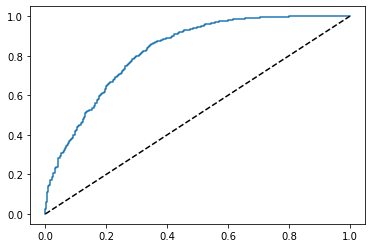

In [275]:
#Додатково використав метрику "ROC curve"
y_pred_proba = logmodel.predict_proba(X_test)[:, 1]
fpr, tpr, thr = metrics.roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')

In [276]:
metrics.roc_auc_score(y_test, y_pred_proba)

0.8241095319735303

In [280]:
# 7(2). Утворюю  модель, використовуючи модель "дерево рішень", треную її і перевіряю скор на трейні та тесті
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

model.fit(X_train, y_train)

DecisionTreeClassifier()

In [281]:
model.score(X_test, y_test)

0.9912317327766179

In [285]:
scores = cross_val_score(estimator=DecisionTreeClassifier(max_depth=9), X=X, y=y, scoring='accuracy', cv=5)
print(scores)
print(scores.mean())

[0.98068894 0.99373695 0.99164927 0.98590078 0.98746736]
0.98788866055806


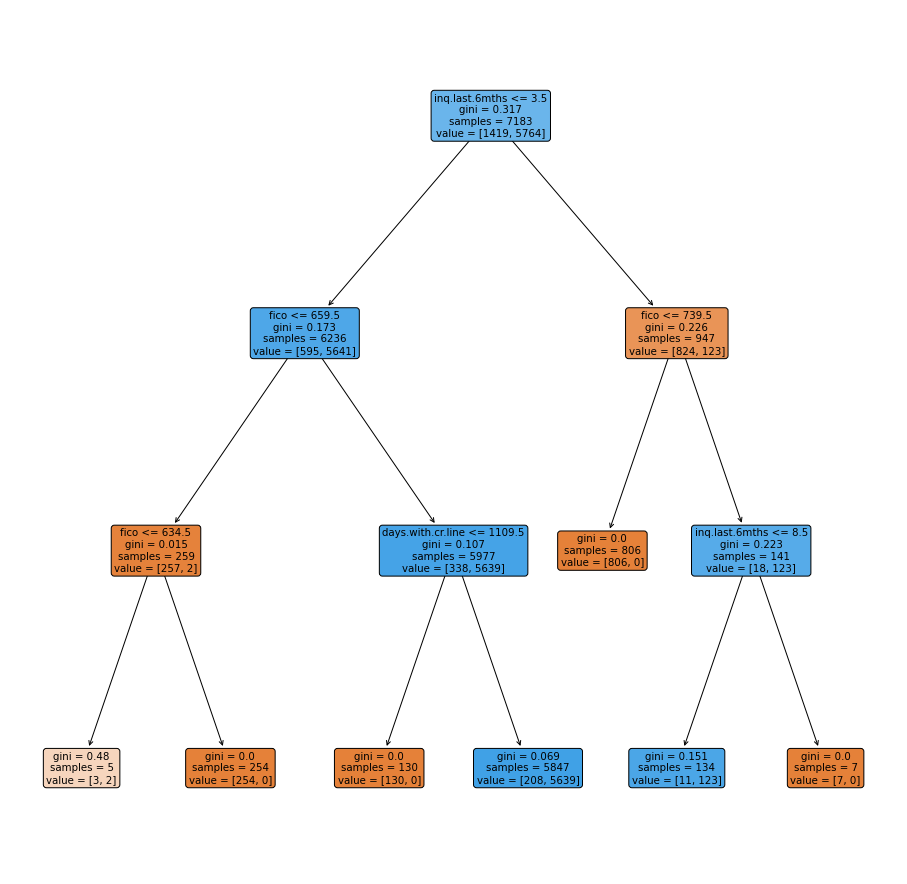

In [288]:
#Інтерпретація (візуалізація) результатів моделі дерева рішень
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

plt.figure(figsize=(16,16))
plot_tree(model, feature_names=X.columns, filled=True,  rounded=True)
plt.show()

In [297]:
#8.(2) Виведення матриць та основних метрик моделі "дерево рішень"
y_predictions1 = model.predict(X_test)

print('confusion_matrix:')
print(metrics.confusion_matrix(y_test,y_predictions1))
print(metrics.classification_report(y_test,y_predictions1))

confusion_matrix:
[[ 378   71]
 [   0 1946]]
              precision    recall  f1-score   support

           0       1.00      0.84      0.91       449
           1       0.96      1.00      0.98      1946

    accuracy                           0.97      2395
   macro avg       0.98      0.92      0.95      2395
weighted avg       0.97      0.97      0.97      2395



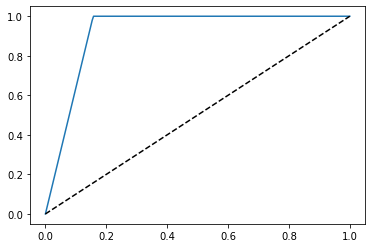

In [299]:
#Додатково використав метрику "ROC curve"
y_pred_proba1 = model.predict_proba(X_test)[:, 1]
fpr, tpr, thr = metrics.roc_curve(y_test, y_pred_proba1)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')

In [321]:
# 7(3). Утворюю  модель, використовуючи модель "Random Forest", треную її і перевіряю скор на трейні та тесті
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

model_1 = RandomForestClassifier()
model_1.fit(X_train, y_train)

RandomForestClassifier()

In [322]:
model_1.score(X_test, y_test)

0.9933194154488518

In [323]:
scores = cross_val_score(estimator=model_1, X=X, y=y, scoring='accuracy', cv=5)
print(scores)
print(scores.mean())

[0.97912317 0.99425887 0.99164927 0.9848564  0.98642298]
0.987262137721646


In [324]:
#8.(3) Виведення матриць та основних метрик моделі "Random Forest"
y_predictions2 = model_1.predict(X_test)

print('confusion_matrix:')
print(metrics.confusion_matrix(y_test,y_predictions2))
print(metrics.classification_report(y_test,y_predictions2))

confusion_matrix:
[[ 435   14]
 [   2 1944]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       449
           1       0.99      1.00      1.00      1946

    accuracy                           0.99      2395
   macro avg       0.99      0.98      0.99      2395
weighted avg       0.99      0.99      0.99      2395



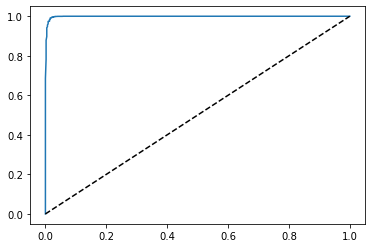

In [325]:
#Додатково використав метрику "ROC curve"
y_pred_proba2 = model_1.predict_proba(X_test)[:, 1]
fpr, tpr, thr = metrics.roc_curve(y_test, y_pred_proba2)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')

In [328]:
# Оскільки у мене чомусь відсутній був модуль xgboost, тому я його встановив
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable



In [329]:
# 7(4). Утворюю  модель, використовуючи модель "XGBoost, треную її і перевіряю скор на трейні та тесті
import xgboost as xgb
xgb_class = xgb.XGBClassifier()


In [330]:
xgb_class.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [331]:
xgb_class.score(X_test, y_test)

0.9954070981210856

In [332]:
scores = cross_val_score(estimator=xgb_class, X=X, y=y, scoring='accuracy', cv=5)
print(scores)
print(scores.mean())

[0.97807933 0.99634656 0.99321503 0.99112272 0.99060052]
0.9898728312356575


In [333]:
#8.(4) Виведення матриць та основних метрик моделі "XGBoost"
y_predictions3 = xgb_class.predict(X_test)

print('confusion_matrix:')
print(metrics.confusion_matrix(y_test,y_predictions3))
print(metrics.classification_report(y_test,y_predictions3))

confusion_matrix:
[[ 442    7]
 [   4 1942]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       449
           1       1.00      1.00      1.00      1946

    accuracy                           1.00      2395
   macro avg       0.99      0.99      0.99      2395
weighted avg       1.00      1.00      1.00      2395



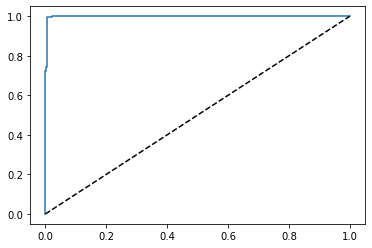

In [334]:
#Додатково використав метрику "ROC curve"
y_pred_proba3 = xgb_class.predict_proba(X_test)[:, 1]
fpr, tpr, thr = metrics.roc_curve(y_test, y_pred_proba3)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')

In [291]:
# 9*. Спробував візуалізувати з dtreeviz, але не вийшло (помилка)
pip install dtreeviz 

Defaulting to user installation because normal site-packages is not writeable

  Created wheel for dtreeviz: filename=dtreeviz-1.3.7-py3-none-any.whl size=68151 sha256=f530d0336b007d6710b4458126d09e7135b52a6cf807025ce5e120ed7b7a7b31
  Stored in directory: c:\users\bu400a\appdata\local\pip\cache\wheels\94\4d\ca\df6b7427d49df660c50c351242463476c3f7935c359402e42b
Successfully built dtreeviz


In [292]:
import dtreeviz

from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *

dt = DecisionTreeRegressor(max_depth=3, criterion="mae")
dt.fit(X, y)

fig = plt.figure()
ax = fig.gca()
rtreeviz_univar(dt, X, y, 'WGT', 'MPG', ax=ax)
plt.show()

In [308]:
viz = dtreeviz(model,
               x_data=X_train,
               y_data=y_train,
               target_name='class',
               title="Decision Tree - Iris data set")
viz

C:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

In [335]:
# 10. Побудова ансамбля voting для всіх моделей
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(max_iter=1000)
clf2 = DecisionTreeClassifier(max_depth=3)
clf3 = RandomForestClassifier()
clf4 = xgb.XGBClassifier()

clf = VotingClassifier(estimators=[('LogisticRegression', clf1),
                                   ('DecisionTreeClassifier', clf2),
                                   ('RandomForestClassifier', clf3), 
                                   ('xgb.XGBClassifier', clf4) ])

In [336]:
clf

VotingClassifier(estimators=[('LogisticRegression',
                              LogisticRegression(max_iter=1000)),
                             ('DecisionTreeClassifier',
                              DecisionTreeClassifier(max_depth=3)),
                             ('RandomForestClassifier',
                              RandomForestClassifier()),
                             ('xgb.XGBClassifier',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            ear...
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constrain

In [337]:
# треную
clf.fit(X_train, y_train)

VotingClassifier(estimators=[('LogisticRegression',
                              LogisticRegression(max_iter=1000)),
                             ('DecisionTreeClassifier',
                              DecisionTreeClassifier(max_depth=3)),
                             ('RandomForestClassifier',
                              RandomForestClassifier()),
                             ('xgb.XGBClassifier',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            ear...
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constrain

In [338]:
# перевіряю на якість
clf.score(X_test, y_test)

0.9924843423799582

In [339]:
scores = cross_val_score(estimator=clf, X=X, y=y, scoring='accuracy', cv=5)
print(scores)
print(scores.mean())

[0.98016701 0.99321503 0.99321503 0.98746736 0.98590078]
0.9879930446916717


In [340]:
# середня якість моделі
clf = VotingClassifier(estimators=[('LogisticRegression', clf1),
                                   ('DecisionTreeClassifier', clf2),
                                   ('RandomForestClassifier', clf3), 
                                   ('xgb.XGBClassifier', clf4)],
                       voting='soft')
scores = cross_val_score(estimator=clf, X=X, y=y, scoring='accuracy', cv=5)
print(scores)
print(scores.mean())

[0.97860125 0.98173278 0.98382046 0.98328982 0.98067885]
0.9816246313850112


In [341]:
# 11. Порівняння результатів всіх моделей
for clf in [clf1, clf2, clf3, clf4]:
    scores = cross_val_score(estimator=clf, X=X, y=y, scoring='accuracy', cv=5)
    print(scores)
    print(scores.mean())

[0.86743215 0.87526096 0.87995825 0.91906005 0.92480418]
0.89330311735175
[0.9723382  0.96920668 0.97338205 0.9691906  0.96240209]
0.9693039240803021
[0.97912317 0.99425887 0.99164927 0.9843342  0.9843342 ]
0.9867399445101578
[0.97807933 0.99634656 0.99321503 0.99112272 0.99060052]
0.9898728312356575


In [ ]:
# Порівнюючи результати моделей('LogisticRegression', 'DecisionTreeClassifier','RandomForestClassifier', 'xgb.XGBClassifier')
#можна зробити висновок, що найгірший результат вийшов в моделі 'LogisticRegression',а решта моделей приблизно однакові 
# показали результати, хоча найвищі і найращі показали моделі 'RandomForestClassifier' та 'xgb.XGBClassifier'. Дане також
# візуально підтверджує метрика "ROC curve", де при моделях 'RandomForestClassifier', 'xgb.XGBClassifier' майже ідеальні криві.
# Таким чином, можна зробити висновок, що якість мделі складає:
#'LogisticRegression' приблизно 89,3%,'
# DecisionTreeClassifier' - 96,9%,
#'RandomForestClassifier' - 98,7%
#'xgb.XGBClassifier' - 98,9%, 
# Тому кінцевим висновком може бути те, що для даного набору даних найкращий результат дозволить показати 
#модель 'xgb.XGBClassifier'

### Завдання 2:

Просте завдання на обробку часових рядів.

Потрібно вивести наступну інформацію: 
1. Виведіть список унікальних міст з датасету
2. Виведіть дату початку та кінця ведення даних
3. Яка середня конценрація $NO_2$ для кожного дня тижня і міста (виведіть таблицю)?
4. Яке середнє значення для кожної години (виведіть стовбчикову діаграму)?

In [50]:
url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/data/air_quality_no2_long.csv"

In [66]:
df3 = pd.read_csv('https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/data/air_quality_no2_long.csv')
df3.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [62]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       2068 non-null   object 
 1   country    2068 non-null   object 
 2   date.utc   2068 non-null   object 
 3   location   2068 non-null   object 
 4   parameter  2068 non-null   object 
 5   value      2068 non-null   float64
 6   unit       2068 non-null   object 
dtypes: float64(1), object(6)
memory usage: 113.2+ KB


In [68]:
df3.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
city,2068,3,Paris,1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,2068,3,FR,1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date.utc,2068,1033,2019-05-18 19:00:00+00:00,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,2068,3,FR04014,1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parameter,2068,1,no2,2068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
value,2068.0,NaN,NaN,NaN,26.261847,13.479451,0.0,17.0,25.0,33.0,97.0
unit,2068,1,µg/m³,2068,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
#1.Виведення списку унікальних міст з датасету
df3['city'].unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [160]:
#2. Виведення дати початку та кінця ведення даних
e=df3['date.utc'].tolist()
e

['2019-06-21 00:00:00+00:00',
 '2019-06-20 23:00:00+00:00',
 '2019-06-20 22:00:00+00:00',
 '2019-06-20 21:00:00+00:00',
 '2019-06-20 20:00:00+00:00',
 '2019-06-20 19:00:00+00:00',
 '2019-06-20 18:00:00+00:00',
 '2019-06-20 17:00:00+00:00',
 '2019-06-20 16:00:00+00:00',
 '2019-06-20 15:00:00+00:00',
 '2019-06-20 14:00:00+00:00',
 '2019-06-20 13:00:00+00:00',
 '2019-06-19 10:00:00+00:00',
 '2019-06-19 09:00:00+00:00',
 '2019-06-18 22:00:00+00:00',
 '2019-06-18 21:00:00+00:00',
 '2019-06-18 20:00:00+00:00',
 '2019-06-18 19:00:00+00:00',
 '2019-06-18 08:00:00+00:00',
 '2019-06-18 07:00:00+00:00',
 '2019-06-18 06:00:00+00:00',
 '2019-06-18 05:00:00+00:00',
 '2019-06-18 04:00:00+00:00',
 '2019-06-18 03:00:00+00:00',
 '2019-06-18 02:00:00+00:00',
 '2019-06-18 01:00:00+00:00',
 '2019-06-18 00:00:00+00:00',
 '2019-06-17 23:00:00+00:00',
 '2019-06-17 22:00:00+00:00',
 '2019-06-17 21:00:00+00:00',
 '2019-06-17 20:00:00+00:00',
 '2019-06-17 19:00:00+00:00',
 '2019-06-17 18:00:00+00:00',
 '2019-06-

In [164]:
e[-1]  # початок дати

'2019-05-07 01:00:00+00:00'

In [161]:
e[0] # кінець дати

'2019-06-21 00:00:00+00:00'

In [355]:
#2й варіант як можа побачити початок і кінець дат
df3.sort_values('date.utc', ascending=True)

,city,country,date.utc,location,parameter,value,unit
2067,London,GB,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,µg/m³
1098,Antwerpen,BE,2019-05-07 01:00:00+00:00,BETR801,no2,50.5,µg/m³
1003,Paris,FR,2019-05-07 01:00:00+00:00,FR04014,no2,25.0,µg/m³
1002,Paris,FR,2019-05-07 02:00:00+00:00,FR04014,no2,27.7,µg/m³
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³
...,...,...,...,...,...,...,...
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³


In [352]:
# 3. Виведення таблиці середньої конценрації 𝑁𝑂2NO2 для кожного дня тижня і міста
df3[['date.utc', 'city', 'value']].groupby(['date.utc','city'], as_index=True).mean().sort_values(by='value', ascending=False)

,,value
date.utc,city,
2019-05-09 15:00:00+00:00,London,97.0
2019-05-23 08:00:00+00:00,Paris,97.0
2019-05-23 07:00:00+00:00,Paris,91.8
2019-06-01 00:00:00+00:00,Paris,84.7
2019-05-31 23:00:00+00:00,Paris,81.7
...,...,...
2019-06-05 09:00:00+00:00,London,0.0
2019-06-05 08:00:00+00:00,London,0.0
2019-06-09 09:00:00+00:00,London,0.0


<AxesSubplot:xlabel='date.utc'>

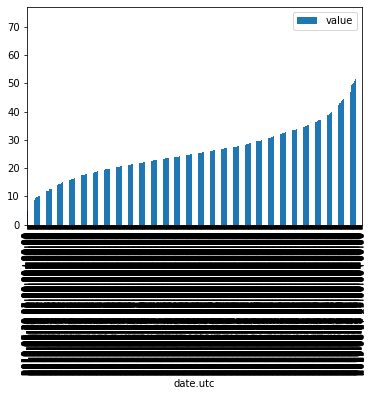

In [357]:
# 4. Dиведення стовбчикової діаграми середнього значення для кожної години
#1-й Варіант
df3[['date.utc', 'value']].groupby(['date.utc'], as_index=False).mean().sort_values(by='value') \
    .plot.bar(x='date.utc', y='value')

<AxesSubplot:xlabel='date.utc'>

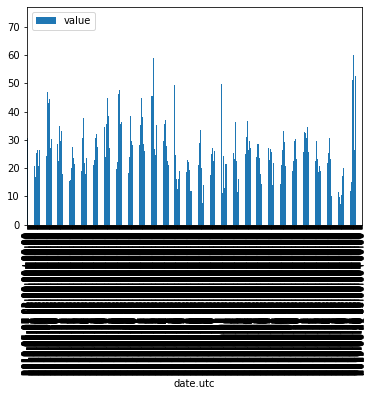

In [356]:
# 4. Dиведення стовбчикової діаграми середнього значення для кожної години
#2-й Варіант
df3[['date.utc', 'value']].groupby(['date.utc'], as_index=False).mean().plot.bar(x='date.utc', y='value')  